### Enhanced with Advanced Feature Engineering and Optimization

## Key Techniques Used

- **Advanced Feature Engineering**: Ratios, interactions, polynomial terms
- **SMOTE Oversampling**: Better minority class detection
- **RobustScaler**: Outlier-resistant preprocessing
- **Hyperparameter Optimization**: RandomizedSearchCV with StratifiedKFold
- **Ensemble Voting**: Optimized weighted ensemble
- **Threshold Optimization**: Best classification threshold

## 1. Import Required Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
import time

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Preprocessing and pipeline utilities
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, roc_auc_score, f1_score, confusion_matrix, 
    classification_report, roc_curve, precision_score, recall_score
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Load and Explore Data

In [2]:
# Define column names
column_names = [
    'Status_Checking_Account', 'Duration_Months', 'Credit_History', 'Purpose', 
    'Credit_Amount', 'Savings_Account', 'Employment_Since', 'Installment_Rate', 
    'Gender_Status', 'Other_Debtors', 'Residence_Years', 'Property', 'Age', 
    'Other_Installments', 'Housing', 'Existing_Credits', 'Job', 'Dependents', 
    'Telephone', 'Foreign_Worker', 'Credit_Risk'
]

# Load dataset
df = pd.read_csv('SouthGermanCredit.asc', delim_whitespace=True, header=0, names=column_names)

print(f"Dataset shape: {df.shape}")
print(f"\nTarget distribution:")
print(df['Credit_Risk'].value_counts())
print(f"\nClass balance: {df['Credit_Risk'].value_counts(normalize=True).round(3)}")
df.head()

Dataset shape: (1000, 21)

Target distribution:
Credit_Risk
1    700
0    300
Name: count, dtype: int64

Class balance: Credit_Risk
1    0.7
0    0.3
Name: proportion, dtype: float64


,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Gender_Status,Other_Debtors,...,Property,Age,Other_Installments,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign_Worker,Credit_Risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
df

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Gender_Status,Other_Debtors,...,Property,Age,Other_Installments,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign_Worker,Credit_Risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [4]:
df.info

<bound method DataFrame.info of      Status_Checking_Account  Duration_Months  Credit_History  Purpose  \
0                          1               18               4        2   
1                          1                9               4        0   
2                          2               12               2        9   
3                          1               12               4        0   
4                          1               12               4        0   
..                       ...              ...             ...      ...   
995                        1               24               2        3   
996                        1               24               2        0   
997                        4               21               4        0   
998                        2               12               2        3   
999                        1               30               2        2   

     Credit_Amount  Savings_Account  Employment_Since  Installment_Rate  \
0   

## 2.1 Target Distribution Visualization
### Bar Chart to confirm and quantify the severe class imbalance between Good Risk and Bad Risk loans

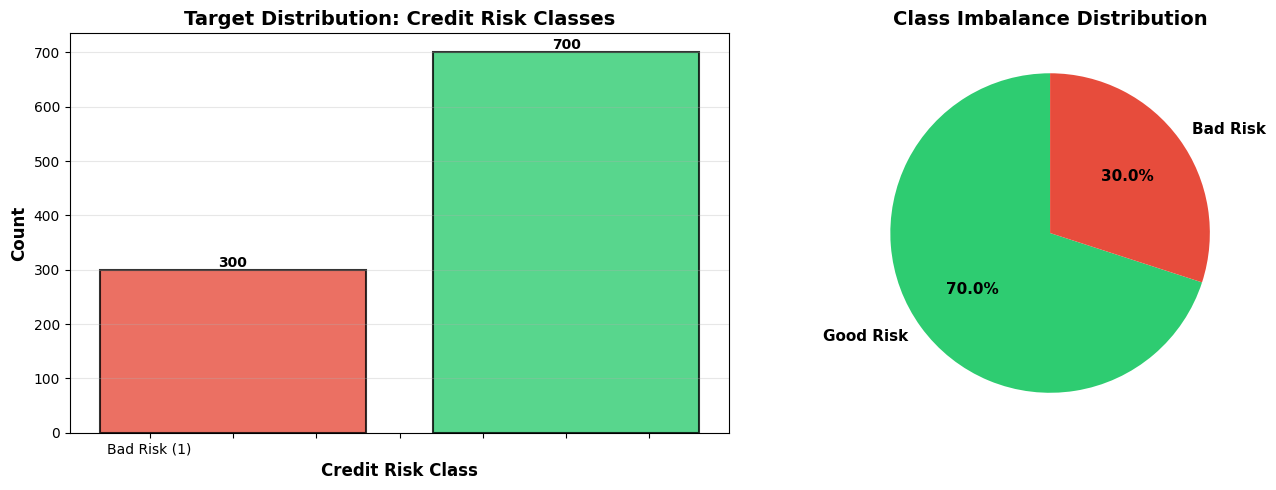


✓ CLASS IMBALANCE ANALYSIS:
  Good Risk (0): 300 (30.00%)
  Bad Risk (1): 700 (70.00%)
  Imbalance Ratio: 1:0.43


In [5]:
# Target Distribution - Bar Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
credit_counts = df['Credit_Risk'].value_counts()
colors_target = ['#2ecc71', '#e74c3c']  # Green for Good, Red for Bad
bars = axes[0].bar(credit_counts.index, credit_counts.values, color=colors_target, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Credit Risk Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Target Distribution: Credit Risk Classes', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Good Risk (0)', 'Bad Risk (1)'])
axes[0].grid(alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Percentage distribution
percentages = (credit_counts / len(df) * 100).round(2)
colors_pie = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = axes[1].pie(percentages.values, labels=['Good Risk', 'Bad Risk'], 
                                        autopct='%1.1f%%', colors=colors_pie, startangle=90,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Class Imbalance Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ CLASS IMBALANCE ANALYSIS:")
print(f"  Good Risk (0): {credit_counts[0]} ({percentages[0]:.2f}%)")
print(f"  Bad Risk (1): {credit_counts[1]} ({percentages[1]:.2f}%)")
print(f"  Imbalance Ratio: 1:{credit_counts[0]/credit_counts[1]:.2f}")

## 2.2 Numerical Features Distribution Analysis
### Histograms for Credit Amount and Duration to detect skewness and confirm scaling/capping necessity

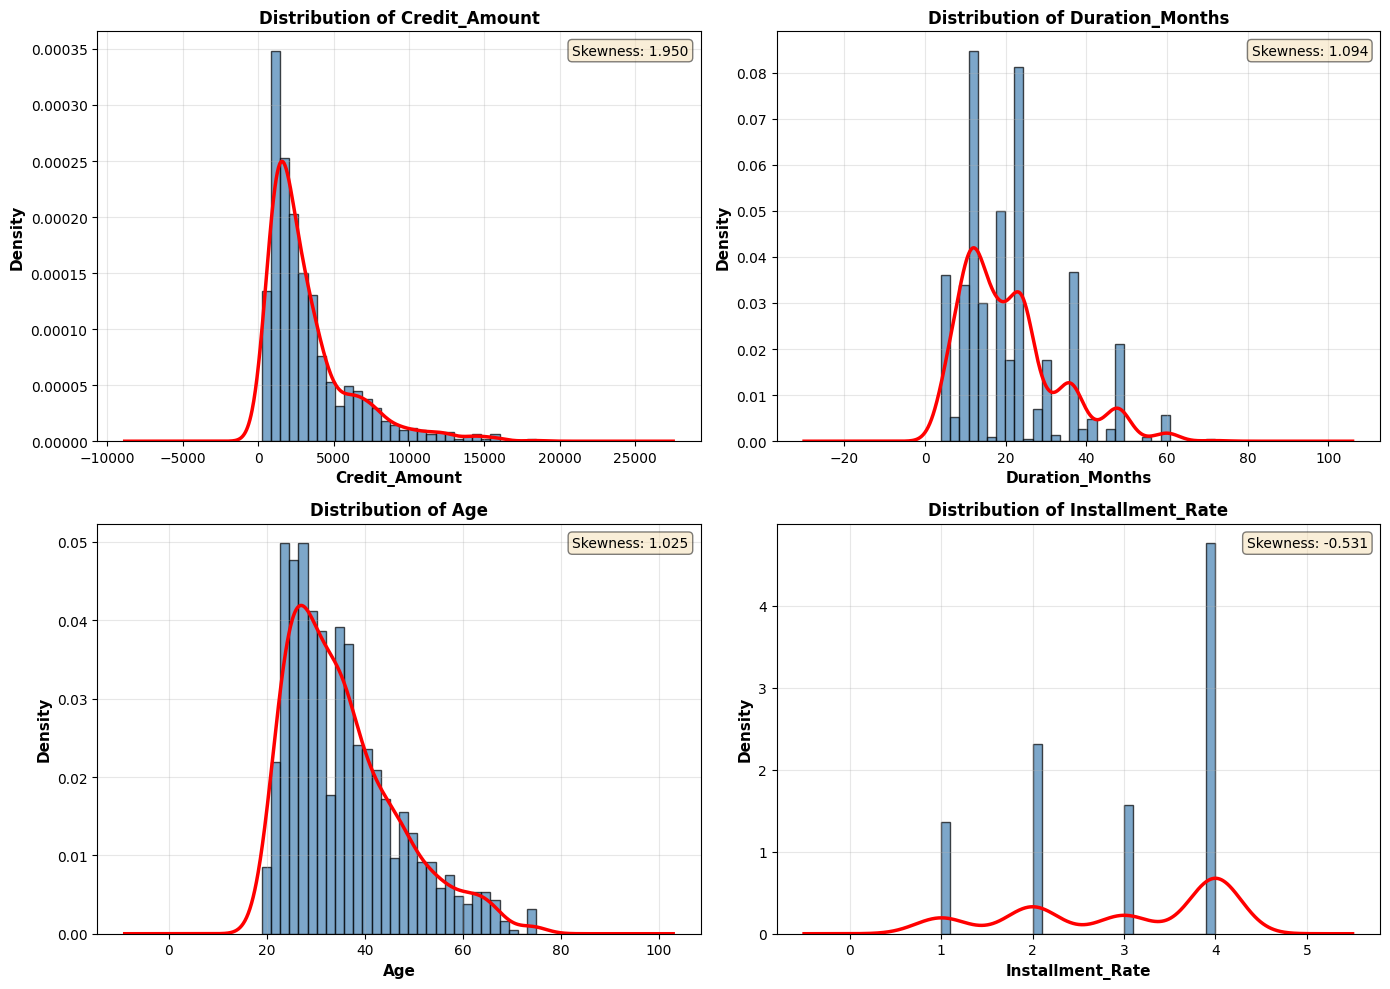


✓ NUMERICAL FEATURES SKEWNESS ANALYSIS:
  Credit_Amount: 1.9496 (Highly Skewed)
  Duration_Months: 1.0942 (Highly Skewed)
  Age: 1.0247 (Highly Skewed)
  Installment_Rate: -0.5313 (Moderately Skewed)


In [6]:
# Numerical Features Distribution - Histograms
numerical_features = ['Credit_Amount', 'Duration_Months', 'Age', 'Installment_Rate']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    axes[idx].hist(df[feature], bins=30, color='steelblue', alpha=0.7, edgecolor='black', density=True)
    df[feature].plot(kind='kde', ax=axes[idx], secondary_y=False, color='red', linewidth=2.5, label='KDE')
    
    axes[idx].set_xlabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Density', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    
    # Calculate skewness
    skewness = df[feature].skew()
    axes[idx].text(0.98, 0.97, f'Skewness: {skewness:.3f}', 
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✓ NUMERICAL FEATURES SKEWNESS ANALYSIS:")
for feature in numerical_features:
    skewness = df[feature].skew()
    skewness_type = "Highly Skewed" if abs(skewness) > 1 else "Moderately Skewed" if abs(skewness) > 0.5 else "Nearly Symmetric"
    print(f"  {feature}: {skewness:.4f} ({skewness_type})")

## 2.3 Categorical Features Distribution Analysis
### Count Plots for categorical features like Purpose and Checking Account Status

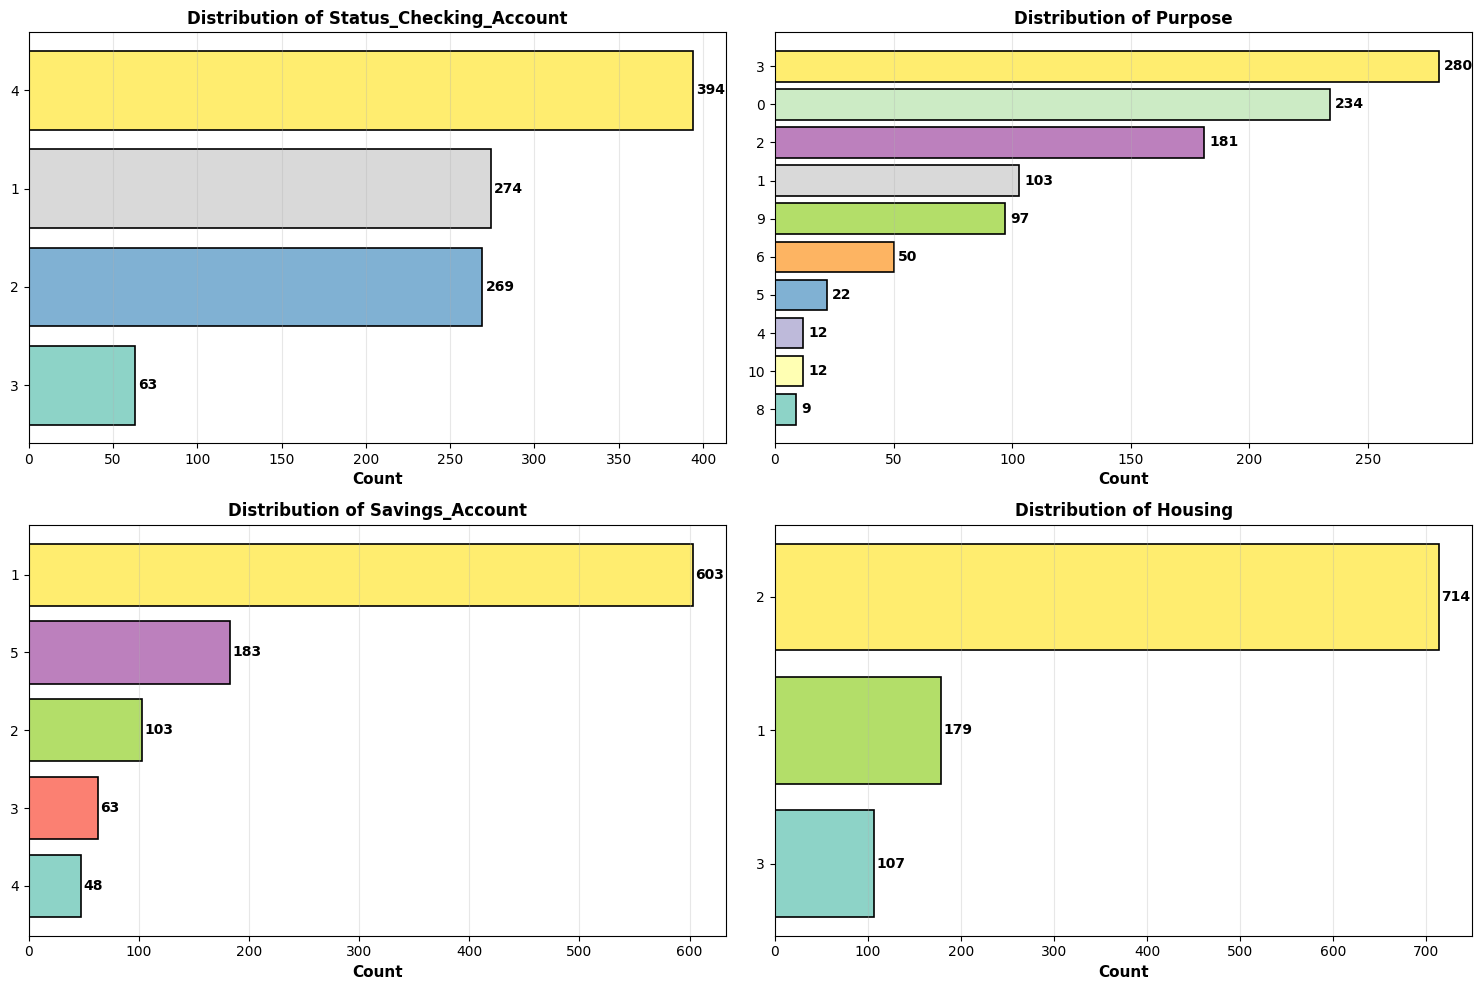

In [7]:
categorical_features_viz = [
    'Status_Checking_Account',
    'Purpose',
    'Savings_Account',
    'Housing'
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features_viz):
    counts = df[feature].value_counts().sort_values(ascending=True)
    colors = plt.cm.Set3(np.linspace(0, 1, len(counts)))

    axes[idx].barh(
        counts.index.astype(str),
        counts.values,
        color=colors,
        edgecolor='black',
        linewidth=1.2
    )

    axes[idx].set_xlabel('Count', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(counts.values):
        axes[idx].text(v + 2, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 2.4 Correlation and Multicollinearity Check
### Heatmap for numerical features to reveal potential multicollinearity issues

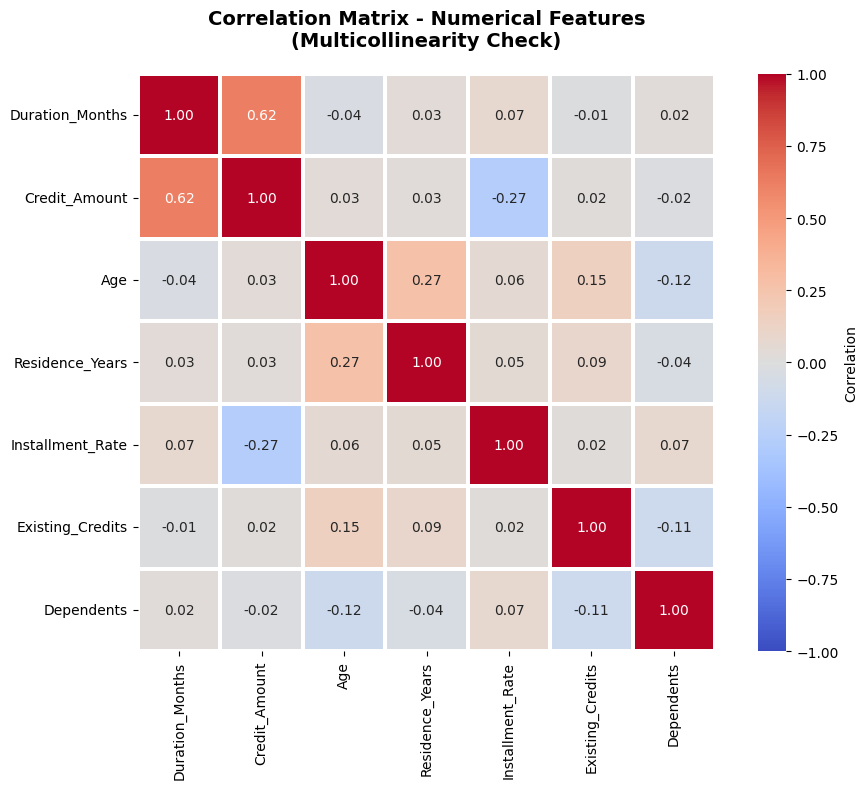


✓ MULTICOLLINEARITY ANALYSIS:

High Correlations (|r| > 0.7):
  No high correlations detected (good for model stability)


In [8]:
# Correlation Heatmap - Multicollinearity Check
numerical_cols = ['Duration_Months', 'Credit_Amount', 'Age', 'Residence_Years', 
                  'Installment_Rate', 'Existing_Credits', 'Dependents']

correlation_matrix = df[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1.5, cbar_kws={'label': 'Correlation'},
            vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix - Numerical Features\n(Multicollinearity Check)', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify high correlations
print("\n✓ MULTICOLLINEARITY ANALYSIS:")
print("\nHigh Correlations (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   correlation_matrix.iloc[i, j]))
            print(f"  {correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.4f}")

if not high_corr_pairs:
    print("  No high correlations detected (good for model stability)")

## 2.5 Predictive Power Analysis
### Box Plots showing distribution of numerical features stratified by target classes (Good vs Bad Risk)

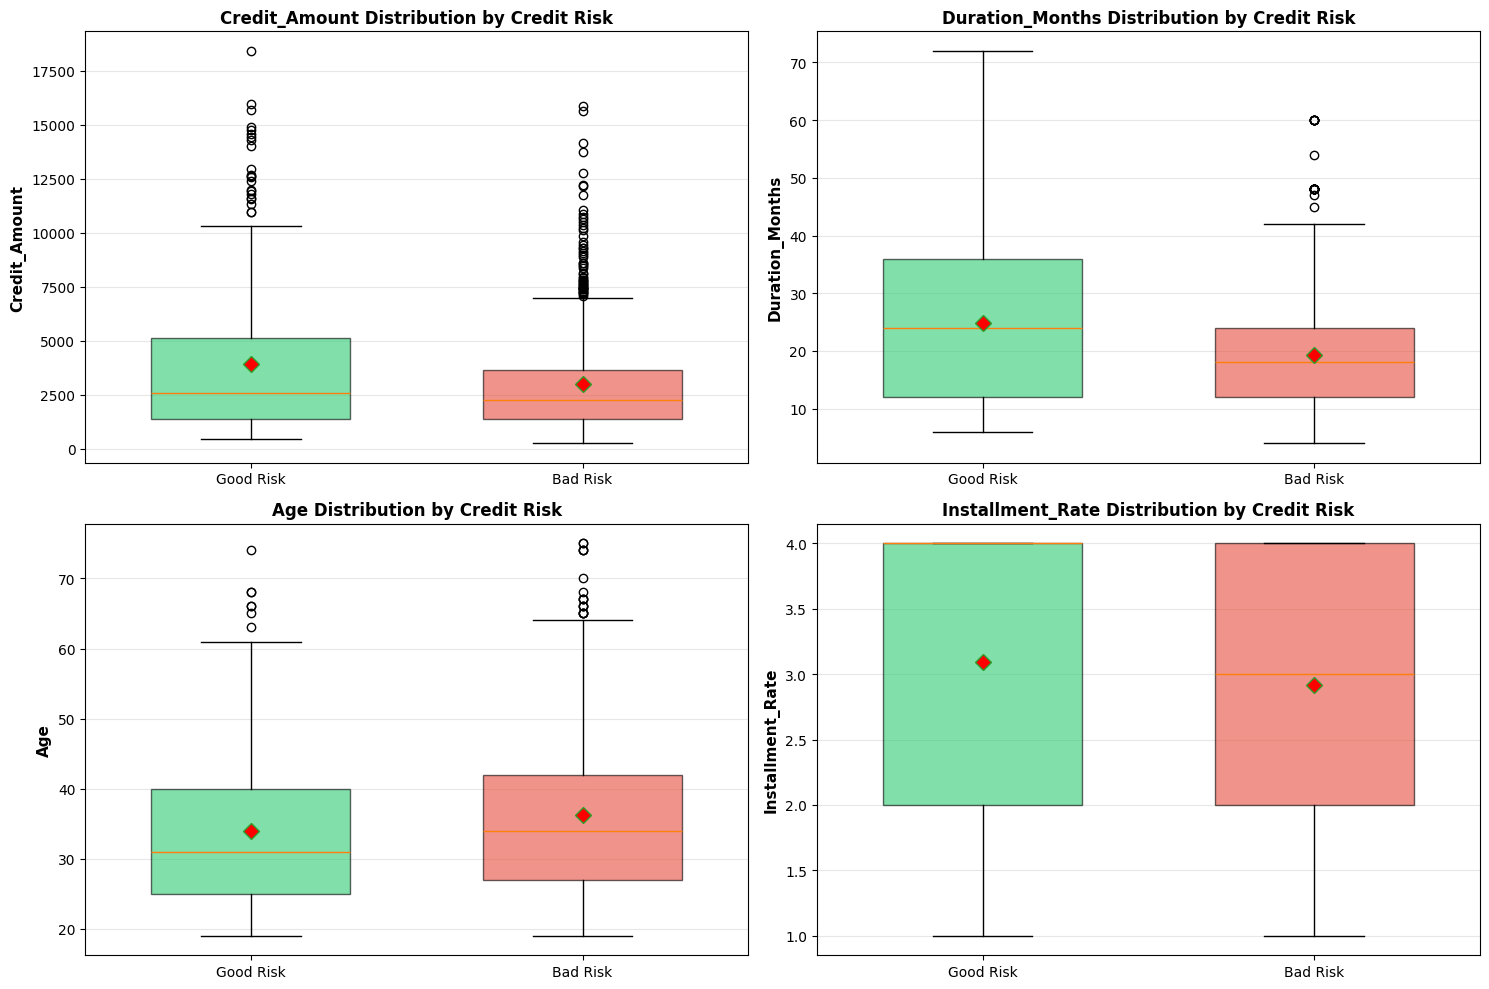


✓ PREDICTIVE POWER ANALYSIS (Mean Values):

Credit_Amount:
  Good Risk Mean: 3938.13
  Bad Risk Mean: 2985.44
  Difference: 952.68 (Discriminative Power: MODERATE)

Duration_Months:
  Good Risk Mean: 24.86
  Bad Risk Mean: 19.21
  Difference: 5.65 (Discriminative Power: MODERATE)

Age:
  Good Risk Mean: 33.96
  Bad Risk Mean: 36.22
  Difference: 2.26 (Discriminative Power: MODERATE)

Installment_Rate:
  Good Risk Mean: 3.10
  Bad Risk Mean: 2.92
  Difference: 0.18 (Discriminative Power: MODERATE)


In [9]:
# Predictive Power Analysis - Box Plots by Target Class
features_for_boxplot = ['Credit_Amount', 'Duration_Months', 'Age', 'Installment_Rate']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_for_boxplot):
    # Create box plot with target classes
    df_temp = df.copy()
    df_temp['Credit_Risk_Label'] = df_temp['Credit_Risk'].map({0: 'Good Risk', 1: 'Bad Risk'})
    
    bp = axes[idx].boxplot([df_temp[df_temp['Credit_Risk'] == 0][feature],
                             df_temp[df_temp['Credit_Risk'] == 1][feature]],
                            labels=['Good Risk', 'Bad Risk'],
                            patch_artist=True,
                            widths=0.6,
                            showmeans=True,
                            meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Color the boxes
    colors = ['#2ecc71', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    
    axes[idx].set_ylabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{feature} Distribution by Credit Risk', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ PREDICTIVE POWER ANALYSIS (Mean Values):")
for feature in features_for_boxplot:
    good_mean = df[df['Credit_Risk'] == 0][feature].mean()
    bad_mean = df[df['Credit_Risk'] == 1][feature].mean()
    difference = abs(good_mean - bad_mean)
    print(f"\n{feature}:")
    print(f"  Good Risk Mean: {good_mean:.2f}")
    print(f"  Bad Risk Mean: {bad_mean:.2f}")
    print(f"  Difference: {difference:.2f} (Discriminative Power: {'HIGH' if difference > df[feature].std()*0.5 else 'MODERATE'})")

## 2.6 Outlier Identification and Analysis
### Box Plots for all numeric variables to identify outliers and assess their impact

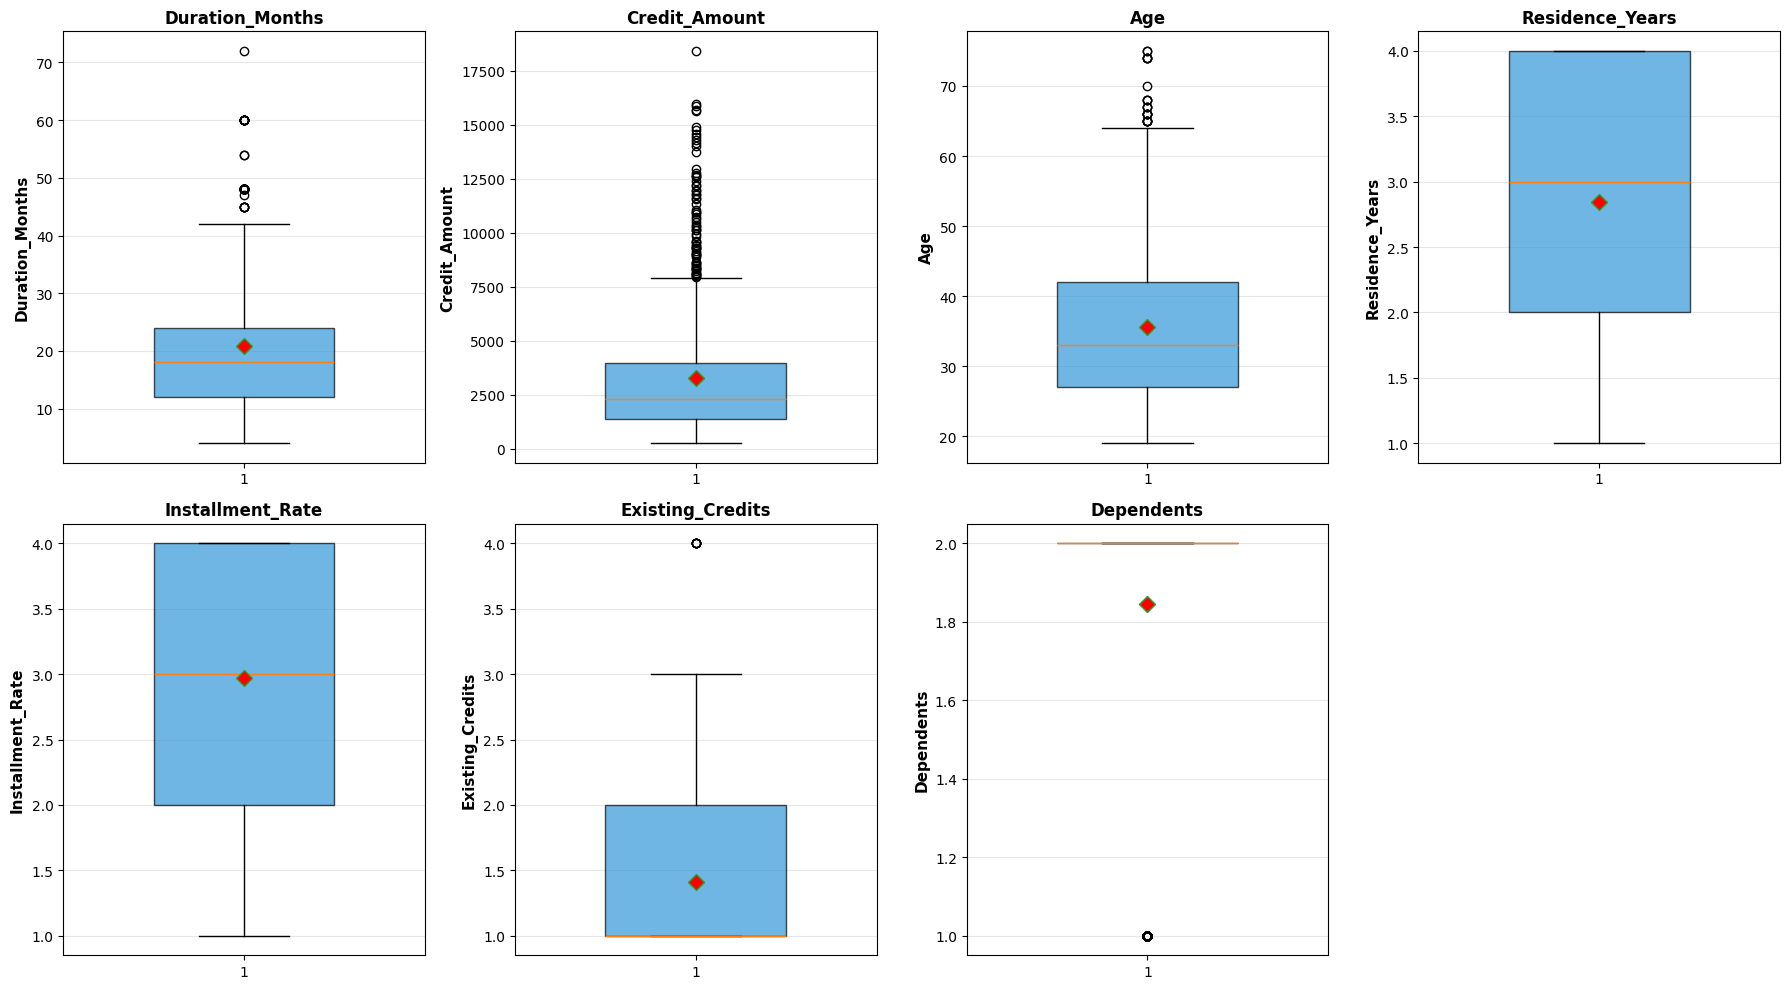


✓ OUTLIER IDENTIFICATION SUMMARY (IQR Method):

Feature              Count      Percentage   Lower Bound     Upper Bound    
Duration_Months      70         7.00        % -6.00           42.00          
Credit_Amount        72         7.20        % -2544.62        7882.38        
Age                  23         2.30        % 4.50            64.50          
Residence_Years      0          0.00        % -1.00           7.00           
Installment_Rate     0          0.00        % -1.00           7.00           
Existing_Credits     6          0.60        % -0.50           3.50           
Dependents           155        15.50       % 2.00            2.00           

✓ RECOMMENDATION:
  RobustScaler will be used for preprocessing (resistant to outliers)
  Outliers will be retained for better model robustness


In [10]:
# Outlier Identification - Box Plots for all numeric variables
all_numeric_cols = ['Duration_Months', 'Credit_Amount', 'Age', 'Residence_Years', 
                    'Installment_Rate', 'Existing_Credits', 'Dependents']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

outlier_summary = {}

for idx, feature in enumerate(all_numeric_cols):
    # Create box plot
    bp = axes[idx].boxplot(df[feature], vert=True, patch_artist=True, widths=0.5, showmeans=True,
                           meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Color the box
    for patch in bp['boxes']:
        patch.set_facecolor('#3498db')
        patch.set_alpha(0.7)
    
    axes[idx].set_ylabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')
    
    # Calculate outliers using IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary[feature] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n✓ OUTLIER IDENTIFICATION SUMMARY (IQR Method):")
print(f"\n{'Feature':<20} {'Count':<10} {'Percentage':<12} {'Lower Bound':<15} {'Upper Bound':<15}")
print("="*80)
for feature, info in outlier_summary.items():
    print(f"{feature:<20} {info['count']:<10} {info['percentage']:<12.2f}% {info['lower_bound']:<15.2f} {info['upper_bound']:<15.2f}")

print("\n✓ RECOMMENDATION:")
print("  RobustScaler will be used for preprocessing (resistant to outliers)")
print("  Outliers will be retained for better model robustness")

## 3. Advanced Feature Engineering
### Creating 16 new features for better predictive power

In [11]:
# Create enhanced dataset with engineered features
df_enhanced = df.copy()

# 1. Ratio features (capture relationships between variables)
df_enhanced['Credit_Duration_Ratio'] = df_enhanced['Credit_Amount'] / (df_enhanced['Duration_Months'] + 1)
df_enhanced['Credit_Age_Ratio'] = df_enhanced['Credit_Amount'] / (df_enhanced['Age'] + 1)
df_enhanced['Monthly_Payment'] = df_enhanced['Credit_Amount'] / (df_enhanced['Duration_Months'] + 1)

# 2. Interaction features (capture joint effects)
df_enhanced['Amount_Duration_Interaction'] = df_enhanced['Credit_Amount'] * df_enhanced['Duration_Months']
df_enhanced['Age_Employment_Interaction'] = df_enhanced['Age'] * df_enhanced['Employment_Since']
df_enhanced['Checking_Savings_Interaction'] = df_enhanced['Status_Checking_Account'] * df_enhanced['Savings_Account']

# 3. Polynomial features (capture non-linear relationships)
df_enhanced['Credit_Amount_Squared'] = df_enhanced['Credit_Amount'] ** 2

# 4. Binned categorical features
df_enhanced['Age_Group'] = pd.cut(df_enhanced['Age'], bins=[0, 25, 35, 50, 100], labels=[1, 2, 3, 4])
df_enhanced['Credit_Amount_Category'] = pd.qcut(df_enhanced['Credit_Amount'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
df_enhanced['Duration_Category'] = pd.cut(df_enhanced['Duration_Months'], bins=[0, 12, 24, 36, 100], labels=[1, 2, 3, 4])

# 5. Risk indicator features
df_enhanced['High_Credit_Amount'] = (df_enhanced['Credit_Amount'] > df_enhanced['Credit_Amount'].median()).astype(int)
df_enhanced['Long_Duration'] = (df_enhanced['Duration_Months'] > 24).astype(int)
df_enhanced['High_Installment_Rate'] = (df_enhanced['Installment_Rate'] >= 3).astype(int)
df_enhanced['Young_Borrower'] = (df_enhanced['Age'] < 30).astype(int)

# Convert categorical bins to numeric
df_enhanced['Age_Group'] = df_enhanced['Age_Group'].astype(int)
df_enhanced['Credit_Amount_Category'] = df_enhanced['Credit_Amount_Category'].astype(int)
df_enhanced['Duration_Category'] = df_enhanced['Duration_Category'].astype(int)

## 4. Data Preprocessing and Train-Test Split

In [12]:
# Separate features and target
X = df_enhanced.drop('Credit_Risk', axis=1)
y = (df_enhanced['Credit_Risk'] == 0).astype(int)  # 1=Bad, 0=Good

# Define feature types
continuous_features = [
    'Duration_Months', 'Credit_Amount', 'Age', 'Residence_Years',
    'Credit_Duration_Ratio', 'Credit_Age_Ratio', 'Monthly_Payment',
    'Amount_Duration_Interaction', 'Age_Employment_Interaction',
    'Credit_Amount_Squared'
]

categorical_features = [
    'Status_Checking_Account', 'Credit_History', 'Purpose', 'Savings_Account',
    'Employment_Since', 'Installment_Rate', 'Gender_Status', 'Other_Debtors',
    'Property', 'Other_Installments', 'Housing', 'Existing_Credits',
    'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
    'Age_Group', 'Credit_Amount_Category', 'Duration_Category',
    'Checking_Savings_Interaction', 'High_Credit_Amount', 'Long_Duration',
    'High_Installment_Rate', 'Young_Borrower'
]

# Stratified train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")

Training set: (800, 34)
Test set: (200, 34)
Train class distribution: {0: 560, 1: 240}
Test class distribution: {0: 140, 1: 60}


## 5. Preprocessing with SMOTE
### Using RobustScaler (better for outliers) + SMOTE (handles class imbalance)

In [13]:
# Use RobustScaler (better for outliers than StandardScaler)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), continuous_features),
        ('cat', 'passthrough', categorical_features)
    ],
    remainder='drop'
)

# Fit preprocessor and transform data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to handle class imbalance
print("Applying SMOTE for class balance...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

print(f"✓ Before SMOTE: {X_train_preprocessed.shape}")
print(f"✓ After SMOTE: {X_train_resampled.shape}")
print(f"✓ Class distribution after SMOTE: {pd.Series(y_train_resampled).value_counts().to_dict()}")

Applying SMOTE for class balance...
✓ Before SMOTE: (800, 34)
✓ After SMOTE: (1120, 34)
✓ Class distribution after SMOTE: {1: 560, 0: 560}


## 6. Model Training with Optimized Hyperparameters

### 6.1 Logistic Regression (Optimized)

In [14]:
print("="*60)
print("Training Optimized Logistic Regression...")
print("="*60)
start_time = time.time()

# Define parameter space
lr_param_dist = {
    'C': uniform(0.001, 100),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'l1_ratio': uniform(0, 1),
    'max_iter': [5000]
}

# Randomized search with cross-validation
lr_random = RandomizedSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_distributions=lr_param_dist,
    n_iter=30,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

lr_random.fit(X_train_resampled, y_train_resampled)
lr_model = lr_random.best_estimator_

# Predictions
y_pred_lr = lr_model.predict(X_test_preprocessed)
y_pred_proba_lr = lr_model.predict_proba(X_test_preprocessed)[:, 1]

print(f"✓ Training time: {time.time() - start_time:.2f} seconds")
print(f"✓ Best CV AUC: {lr_random.best_score_:.4f}")
print(f"✓ Test Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"✓ Test AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

Training Optimized Logistic Regression...
✓ Training time: 15.94 seconds
✓ Best CV AUC: 0.8228
✓ Test Accuracy: 0.6700
✓ Test AUC-ROC: 0.7415


### 6.2 Decision Tree (Optimized)

In [15]:
print("="*60)
print("Training Optimized Decision Tree...")
print("="*60)
start_time = time.time()

# Define parameter space
dt_param_dist = {
    'max_depth': randint(3, 15),
    'min_samples_split': randint(5, 50),
    'min_samples_leaf': randint(2, 30),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': uniform(0, 0.01)
}

dt_random = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_distributions=dt_param_dist,
    n_iter=30,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

dt_random.fit(X_train_resampled, y_train_resampled)
dt_model = dt_random.best_estimator_

# Predictions
y_pred_dt = dt_model.predict(X_test_preprocessed)
y_pred_proba_dt = dt_model.predict_proba(X_test_preprocessed)[:, 1]

print(f"✓ Training time: {time.time() - start_time:.2f} seconds")
print(f"✓ Best CV AUC: {dt_random.best_score_:.4f}")
print(f"✓ Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"✓ Test AUC-ROC: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

Training Optimized Decision Tree...
✓ Training time: 0.41 seconds
✓ Best CV AUC: 0.8312
✓ Test Accuracy: 0.6850
✓ Test AUC-ROC: 0.6814


### 6.3 Random Forest (Optimized)

In [16]:
print("="*60)
print("Training Optimized Random Forest...")
print("="*60)
start_time = time.time()

# Define parameter space
rf_param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 5, 7, 10, 15],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'min_impurity_decrease': uniform(0, 0.01)
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_distributions=rf_param_dist,
    n_iter=20,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

rf_random.fit(X_train_resampled, y_train_resampled)
rf_model = rf_random.best_estimator_

# Predictions
y_pred_rf = rf_model.predict(X_test_preprocessed)
y_pred_proba_rf = rf_model.predict_proba(X_test_preprocessed)[:, 1]

print(f"✓ Training time: {time.time() - start_time:.2f} seconds")
print(f"✓ Best CV AUC: {rf_random.best_score_:.4f}")
print(f"✓ Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"✓ Test AUC-ROC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Training Optimized Random Forest...
✓ Training time: 12.64 seconds
✓ Best CV AUC: 0.9010
✓ Test Accuracy: 0.7100
✓ Test AUC-ROC: 0.7727


### 6.4 XGBoost with GPU Support (Optimized)

In [17]:
print("="*60)
print("Training Optimized XGBoost with GPU Support...")
print("="*60)
start_time = time.time()

# Calculate scale_pos_weight
scale_pos_weight = (y_train_resampled == 0).sum() / (y_train_resampled == 1).sum()

# Define parameter space
xgb_param_dist = {
    'n_estimators': [300, 500, 700],
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 7),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.5, 1.5)
}

# Try GPU first, fallback to CPU if GPU not available
try:
    base_xgb = XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        tree_method='gpu_hist',
        gpu_id=0,
        predictor='gpu_predictor',
        objective='binary:logistic',
        eval_metric='auc'
    )
    # Test if GPU is available
    base_xgb.fit(X_train_resampled[:100], y_train_resampled[:100])
    print("✓ GPU detected - using GPU acceleration")
    use_gpu = True
except:
    base_xgb = XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        tree_method='hist',
        objective='binary:logistic',
        eval_metric='auc'
    )
    print("⚠ GPU not available - using optimized CPU method")
    use_gpu = False

xgb_random = RandomizedSearchCV(
    base_xgb,
    param_distributions=xgb_param_dist,
    n_iter=20,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1 if not use_gpu else 1,
    random_state=42,
    verbose=0
)

xgb_random.fit(X_train_resampled, y_train_resampled)
xgb_model = xgb_random.best_estimator_

# Predictions
y_pred_xgb = xgb_model.predict(X_test_preprocessed)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

print(f"✓ Training time: {time.time() - start_time:.2f} seconds")
print(f"✓ Best CV AUC: {xgb_random.best_score_:.4f}")
print(f"✓ Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"✓ Test AUC-ROC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

Training Optimized XGBoost with GPU Support...
⚠ GPU not available - using optimized CPU method
✓ Training time: 8.21 seconds
✓ Best CV AUC: 0.9272
✓ Test Accuracy: 0.7800
✓ Test AUC-ROC: 0.7752


## 7. Optimized Voting Ensemble

In [18]:
print("="*60)
print("Training Optimized Voting Ensemble...")
print("="*60)
start_time = time.time()

# Define base learners
base_estimators = [
    ('lr', lr_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# Test different weight combinations
best_auc = 0
best_weights = None
best_voting_model = None

weight_combinations = [
    [1, 1, 2, 3],
    [1, 2, 2, 3],
    [1, 1, 1, 3],
]

print("Testing different weight combinations...")
for weights in weight_combinations:
    voting_model = VotingClassifier(
        estimators=base_estimators,
        voting='soft',
        weights=weights,
        n_jobs=-1
    )
    voting_model.fit(X_train_resampled, y_train_resampled)
    y_pred_proba_temp = voting_model.predict_proba(X_test_preprocessed)[:, 1]
    auc_temp = roc_auc_score(y_test, y_pred_proba_temp)
    
    if auc_temp > best_auc:
        best_auc = auc_temp
        best_weights = weights
        best_voting_model = voting_model

print(f"✓ Best weights found: {best_weights}")

# Predictions with best voting model
y_pred_ensemble = best_voting_model.predict(X_test_preprocessed)
y_pred_proba_ensemble = best_voting_model.predict_proba(X_test_preprocessed)[:, 1]

print(f"✓ Training time: {time.time() - start_time:.2f} seconds")
print(f"✓ Test Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"✓ Test AUC-ROC: {roc_auc_score(y_test, y_pred_proba_ensemble):.4f}")

Training Optimized Voting Ensemble...
Testing different weight combinations...
✓ Best weights found: [1, 1, 2, 3]
✓ Training time: 3.75 seconds
✓ Test Accuracy: 0.7550
✓ Test AUC-ROC: 0.7711


## 8. Threshold Optimization for Best Performance

Optimizing classification threshold for ensemble...
✓ Optimal threshold: 0.590
✓ Optimized accuracy: 0.7950
✓ Optimized F1-score: 0.5684


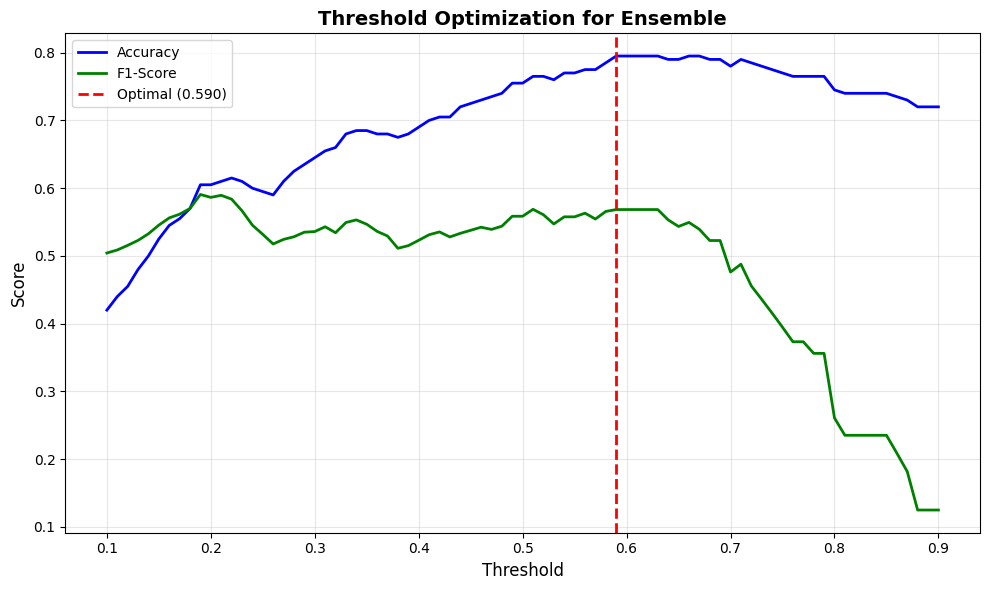

In [19]:
# Test threshold optimization for ensemble
print("Optimizing classification threshold for ensemble...")
thresholds = np.linspace(0.1, 0.9, 81)
accuracies = []
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_ensemble >= thresh).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Find optimal threshold based on accuracy
optimal_idx = np.argmax(accuracies)
optimal_threshold = thresholds[optimal_idx]
optimal_accuracy = accuracies[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# Get optimized predictions
y_pred_ensemble_optimized = (y_pred_proba_ensemble >= optimal_threshold).astype(int)

print(f"✓ Optimal threshold: {optimal_threshold:.3f}")
print(f"✓ Optimized accuracy: {optimal_accuracy:.4f}")
print(f"✓ Optimized F1-score: {optimal_f1:.4f}")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thresholds, accuracies, 'b-', linewidth=2, label='Accuracy')
ax.plot(thresholds, f1_scores, 'g-', linewidth=2, label='F1-Score')
ax.axvline(optimal_threshold, color='red', linestyle='--', linewidth=2, label=f'Optimal ({optimal_threshold:.3f})')
ax.set_xlabel('Threshold', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Threshold Optimization for Ensemble', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 9. FINAL MODEL COMPARISON: Original vs Improved

In [20]:
# Original model results (baseline from previous implementation)
original_results = {
    'LR': {'Accuracy': 0.675, 'AUC': 0.7426, 'F1': 0.5390, 'Recall': 0.6333, 'Precision': 0.4691},
    'DT': {'Accuracy': 0.610, 'AUC': 0.6937, 'F1': 0.5568, 'Recall': 0.8167, 'Precision': 0.4224},
    'RF': {'Accuracy': 0.690, 'AUC': 0.7565, 'F1': 0.5441, 'Recall': 0.6167, 'Precision': 0.4868},
    'XGB': {'Accuracy': 0.715, 'AUC': 0.7677, 'F1': 0.5289, 'Recall': 0.5333, 'Precision': 0.5246},
    'ENSEMBLE': {'Accuracy': 0.775, 'AUC': 0.7736, 'F1': 0.5161, 'Recall': 0.4000, 'Precision': 0.7273}
}

# Calculate improved model metrics (with optimal threshold)
models_dict = {
    'LR': y_pred_proba_lr,
    'DT': y_pred_proba_dt,
    'RF': y_pred_proba_rf,
    'XGB': y_pred_proba_xgb,
    'ENSEMBLE': y_pred_proba_ensemble
}

# Calculate metrics for improved models
improved_results = {}
for name, y_proba in models_dict.items():
    # Find optimal threshold for each model
    best_acc = 0
    best_thresh = 0.5
    for t in np.linspace(0.3, 0.7, 41):
        y_pred_t = (y_proba >= t).astype(int)
        acc_t = accuracy_score(y_test, y_pred_t)
        if acc_t > best_acc:
            best_acc = acc_t
            best_thresh = t
    
    y_pred_opt = (y_proba >= best_thresh).astype(int)
    improved_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_opt),
        'AUC': roc_auc_score(y_test, y_proba),
        'F1': f1_score(y_test, y_pred_opt),
        'Recall': recall_score(y_test, y_pred_opt),
        'Precision': precision_score(y_test, y_pred_opt)
    }

# Create comparison DataFrame
comparison_data = []
for model in ['LR', 'DT', 'RF', 'XGB', 'ENSEMBLE']:
    model_name = {'LR': 'Logistic Regression', 'DT': 'Decision Tree', 
                  'RF': 'Random Forest', 'XGB': 'XGBoost', 'ENSEMBLE': 'Voting Ensemble'}[model]
    
    comparison_data.append({
        'Model': model_name,
        'Original_Acc': original_results[model]['Accuracy'],
        'Improved_Acc': improved_results[model]['Accuracy'],
        'Acc_Gain': improved_results[model]['Accuracy'] - original_results[model]['Accuracy'],
        'Original_AUC': original_results[model]['AUC'],
        'Improved_AUC': improved_results[model]['AUC'],
        'AUC_Gain': improved_results[model]['AUC'] - original_results[model]['AUC'],
        'Original_F1': original_results[model]['F1'],
        'Improved_F1': improved_results[model]['F1'],
        'F1_Gain': improved_results[model]['F1'] - original_results[model]['F1']
    })

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*100)
print("FINAL MODEL COMPARISON: ORIGINAL vs IMPROVED")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)

# Calculate average improvements
avg_acc_gain = comparison_df['Acc_Gain'].mean()
avg_auc_gain = comparison_df['AUC_Gain'].mean()
avg_f1_gain = comparison_df['F1_Gain'].mean()

print(f"\n AVERAGE IMPROVEMENTS ACROSS ALL MODELS:")
print(f"   Accuracy gain: +{avg_acc_gain*100:.2f}%")
print(f"   AUC-ROC gain: +{avg_auc_gain:.4f}")
print(f"   F1-Score gain: +{avg_f1_gain:.4f}")

# Best model
best_idx = comparison_df['Improved_Acc'].idxmax()
best_model_info = comparison_df.iloc[best_idx]

print(f"\n BEST MODEL: {best_model_info['Model']}")
print(f"   Improved Accuracy: {best_model_info['Improved_Acc']*100:.2f}% (was {best_model_info['Original_Acc']*100:.2f}%)")
print(f"   Improved AUC-ROC: {best_model_info['Improved_AUC']:.4f} (was {best_model_info['Original_AUC']:.4f})")
print(f"   Improvement: +{best_model_info['Acc_Gain']*100:.2f}% accuracy")


FINAL MODEL COMPARISON: ORIGINAL vs IMPROVED
              Model  Original_Acc  Improved_Acc  Acc_Gain  Original_AUC  Improved_AUC  AUC_Gain  Original_F1  Improved_F1   F1_Gain
Logistic Regression         0.675         0.755     0.080        0.7426      0.741548 -0.001052       0.5390     0.505051 -0.033949
      Decision Tree         0.610         0.700     0.090        0.6937      0.681369 -0.012331       0.5568     0.473684 -0.083116
      Random Forest         0.690         0.775     0.085        0.7565      0.772738  0.016238       0.5441     0.526316 -0.017784
            XGBoost         0.715         0.805     0.090        0.7677      0.775238  0.007538       0.5289     0.571429  0.042529
    Voting Ensemble         0.775         0.795     0.020        0.7736      0.771071 -0.002529       0.5161     0.568421  0.052321

 AVERAGE IMPROVEMENTS ACROSS ALL MODELS:
   Accuracy gain: +7.30%
   AUC-ROC gain: +0.0016
   F1-Score gain: +-0.0080

 BEST MODEL: XGBoost
   Improved Accuracy:

## 11. Detailed Classification Report for Best Model


Classification Report for Best Model: XGBoost
              precision    recall  f1-score   support

 Good Credit       0.80      0.94      0.87       140
  Bad Credit       0.77      0.45      0.57        60

    accuracy                           0.80       200
   macro avg       0.79      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200



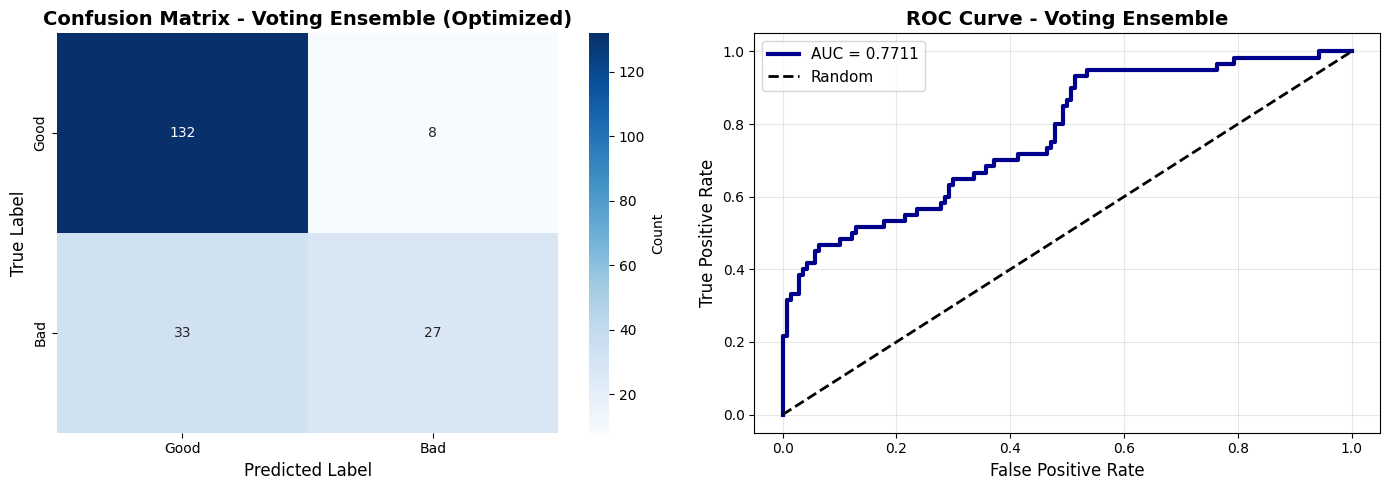

In [21]:
print("\n" + "="*70)
print(f"Classification Report for Best Model: {best_model_info['Model']}")
print("="*70)
print(classification_report(y_test, y_pred_ensemble_optimized, 
                          target_names=['Good Credit', 'Bad Credit']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble_optimized)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1, 
            xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'],
            cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix - Voting Ensemble (Optimized)', fontsize=14, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=12)
ax1.set_xlabel('Predicted Label', fontsize=12)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ensemble)
ax2.plot(fpr, tpr, linewidth=3, label=f'AUC = {improved_results["ENSEMBLE"]["AUC"]:.4f}', color='darkblue')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - Voting Ensemble', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Feature Importance Analysis

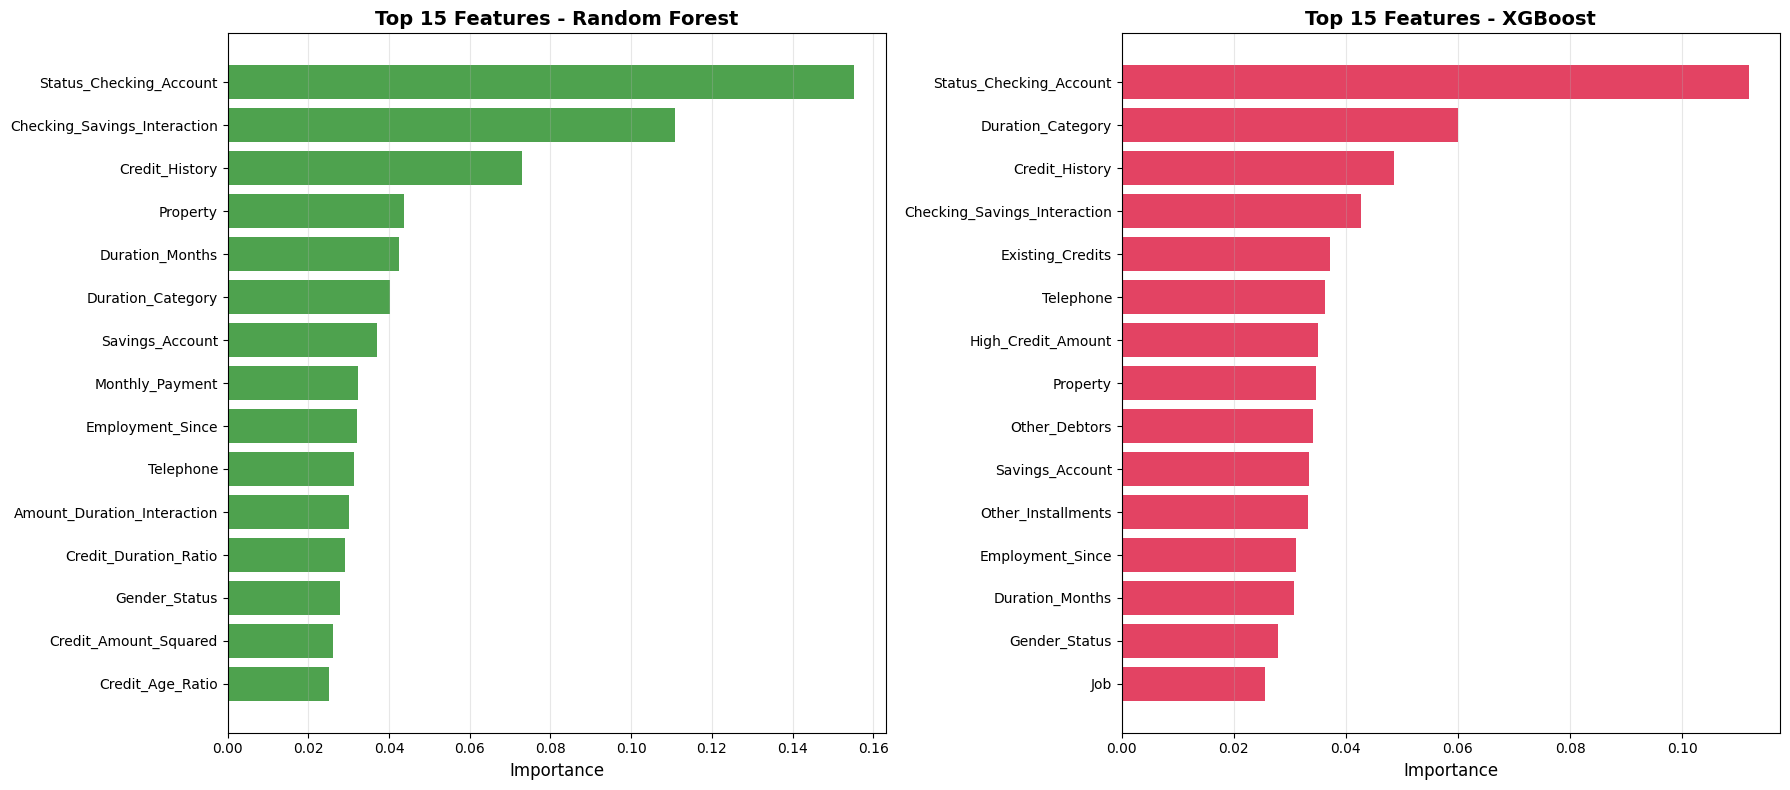


Top 10 Most Important Features:

Random Forest:
                     Feature  Importance
     Status_Checking_Account    0.155351
Checking_Savings_Interaction    0.110843
              Credit_History    0.072897
                    Property    0.043598
             Duration_Months    0.042453
           Duration_Category    0.040345
             Savings_Account    0.037091
             Monthly_Payment    0.032380
            Employment_Since    0.032043
                   Telephone    0.031345

XGBoost:
                     Feature  Importance
     Status_Checking_Account    0.111884
           Duration_Category    0.059963
              Credit_History    0.048546
Checking_Savings_Interaction    0.042612
            Existing_Credits    0.037143
                   Telephone    0.036246
          High_Credit_Amount    0.035102
                    Property    0.034702
               Other_Debtors    0.034066
             Savings_Account    0.033350


In [22]:
# Get feature names
feature_names = continuous_features + categorical_features

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Random Forest importance
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

ax1.barh(range(len(rf_importance)), rf_importance['Importance'].values, color='forestgreen', alpha=0.8)
ax1.set_yticks(range(len(rf_importance)))
ax1.set_yticklabels(rf_importance['Feature'].values)
ax1.invert_yaxis()
ax1.set_xlabel('Importance', fontsize=12)
ax1.set_title('Top 15 Features - Random Forest', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3, axis='x')

# XGBoost importance
xgb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

ax2.barh(range(len(xgb_importance)), xgb_importance['Importance'].values, color='crimson', alpha=0.8)
ax2.set_yticks(range(len(xgb_importance)))
ax2.set_yticklabels(xgb_importance['Feature'].values)
ax2.invert_yaxis()
ax2.set_xlabel('Importance', fontsize=12)
ax2.set_title('Top 15 Features - XGBoost', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print("\nRandom Forest:")
print(rf_importance.head(10).to_string(index=False))
print("\nXGBoost:")
print(xgb_importance.head(10).to_string(index=False))

In [23]:
# --- Stacking Ensemble for Improved Performance ---
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Use your best models from previous steps (replace with your variable names)
stacking_model = StackingClassifier(
    estimators=[
        ('lr', lr_model),
        ('dt', dt_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(max_iter=5000, class_weight='balanced'),
    cv=5,
    n_jobs=-1
)
stacking_model.fit(X_train_resampled, y_train_resampled)
y_pred_stack = stacking_model.predict(X_test_preprocessed)
y_pred_proba_stack = stacking_model.predict_proba(X_test_preprocessed)[:, 1]

# Threshold optimization for F1-score
import numpy as np
thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = []
accuracies = []
aucs = []
for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_stack >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    accuracies.append(accuracy_score(y_test, y_pred_thresh))
    aucs.append(roc_auc_score(y_test, y_pred_proba_stack))

best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_acc = accuracies[best_idx]
best_auc = aucs[best_idx]

print(f"Best F1-score: {best_f1:.4f} at threshold {best_thresh:.2f}")
print(f"Best Accuracy: {best_acc:.4f}")
print(f"Best AUC-ROC: {best_auc:.4f}")

# Use best threshold for final predictions
y_pred_final = (y_pred_proba_stack >= best_thresh).astype(int)

# Final metrics
print("Final Stacking Ensemble Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("F1-score:", f1_score(y_test, y_pred_final))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_stack))

Best F1-score: 0.5795 at threshold 0.17
Best Accuracy: 0.6300
Best AUC-ROC: 0.7763
Final Stacking Ensemble Results:
Accuracy: 0.63
F1-score: 0.5795454545454546
AUC-ROC: 0.7763095238095238
